In [1]:
import pandas as pd
import os
import seaborn as sns
import numpy as np
import scipy
from Bio import Phylo
import matplotlib.pyplot as plt

In [27]:
#add the subject species name to the dataframe
merged_df = pd.DataFrame()
count = 0
for dataframes in os.listdir('/home/collot/stage/collot/collot/out_ortho/one_to_one_events/df'):
    path_to_df = os.path.join('/home/collot/stage/collot/collot/out_ortho/one_to_one_events/df', dataframes)
    df = pd.read_csv(path_to_df, sep='\t')
    count+=1
    print(count)
    gene_number = len(df['gene'].unique())
    df['gene_number']=gene_number
#    name = os.path.splitext(dataframes)[0]
#    df['subject_species']= name.split('_')[1]
    df.to_csv(path_to_df, sep='\t', index=False)
    merged_df = pd.concat([merged_df, df], ignore_index=True)
print(merged_df)



1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


In [28]:
merged_df.to_csv('/home/collot/stage/collot/collot/out_ortho/one_to_one_events/merged_df.csv', sep='\t', index=False)

/tmp/ipykernel_721777/2753801380.py:10: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  distance_df.loc[i][j]=tree.distance(i,j)


['Nycticebus coucang', 'Otolemur garnettii', 'Propithecus coquereli', 'Microcebus murinus', 'Lemur catta', 'Eulemur rufifrons', 'Aotus nancymaae', 'Callithrix jacchus', 'Cebus imitator', 'Sapajus apella', 'Saimiri boliviensis boliviensis', 'Symphalangus syndactylus', 'Hylobates moloch', 'Nomascus leucogenys', 'Gorilla gorilla gorilla', 'Homo sapiens', 'Pan paniscus', 'Pan troglodytes', 'Pongo pygmaeus', 'Pongo abelii', 'Chlorocebus sabaeus', 'Papio anubis', 'Theropithecus gelada', 'Mandrillus leucophaeus', 'Cercocebus atys', 'Macaca thibetana thibetana', 'Macaca mulatta', 'Macaca fascicularis', 'Macaca nemestrina', 'Trachypithecus francoisi', 'Rhinopithecus roxellana', 'Rhinopithecus bieti', 'Piliocolobus tephrosceles', 'Colobus angolensis palliatus', 'Carlito syrichta']
                                 Nycticebus coucang  Otolemur garnettii  \
Nycticebus coucang                              129              144587   
Otolemur garnettii                           151138                 

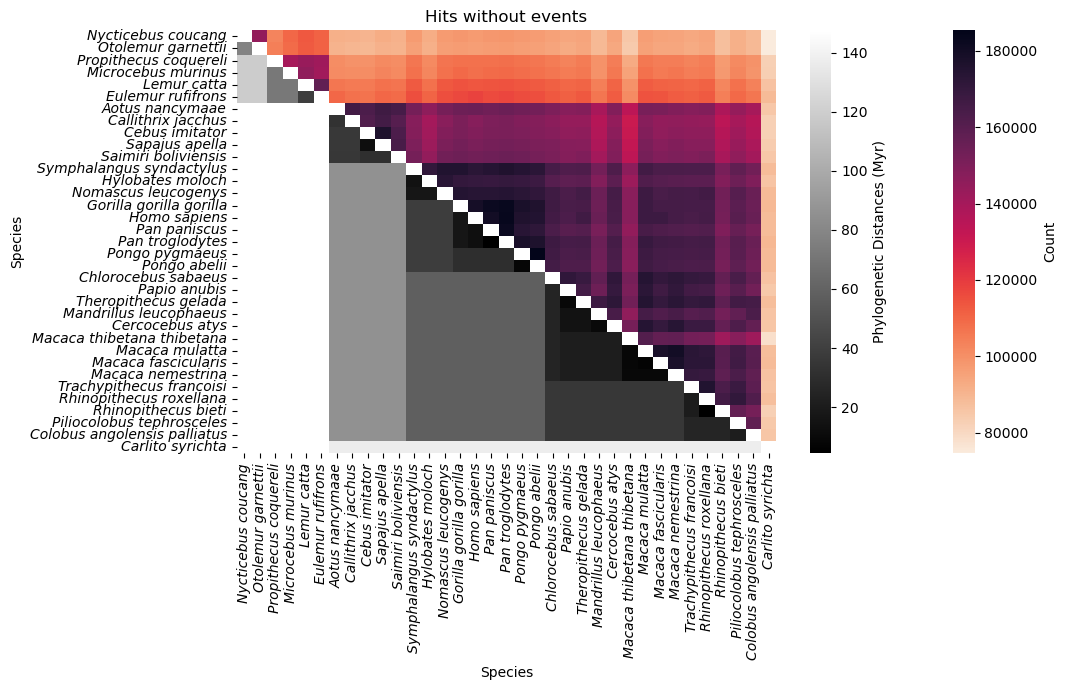

In [35]:
def distance_matrix (path_to_tree_nwk):
    """Create a dataframe (like a matrix) containig distances between all species"""
    tree = Phylo.read(path_to_tree_nwk, format='newick')
    taxa = []
    for term in tree.get_terminals():   #select only terminal nodes
        taxa.append(term.name)  #get the name of the taxa
    distance_df = pd.DataFrame(index = taxa, columns=taxa)
    for i in taxa: 
        for j in taxa : 
            distance_df.loc[i][j]=tree.distance(i,j)
    distance_df= distance_df.astype(float)
    return distance_df

def get_order (distance_df):
    species_order = distance_df.index.to_list()     #create a list with species in a fixed order to use for the other heatmaps
    species_order[10] ='Saimiri_boliviensis_boliviensis'    #change the name used by TimeTree for the one I use
    species_order = [name.replace('_', ' ') for name in species_order] 
    return species_order


def create_ks_df (table_species, path_to_df_species ,data_column, species_order, path_to_matrix) : 
    """Create a ks_score matrix in a dataframe"""
    df_table= pd.read_csv(table_species, sep='\t')
    genid_species = dict(zip(df_table['Organism Taxonomic ID'], df_table['Organism Name']))  #dictionary containing tuples taxa_id/name
    tax_list = []
    species_list = []
    df_all_species = pd.read_csv(path_to_df_species, header=0, sep='\t')
    for tax_id in df_all_species['species'].unique(): 
        tax_list.append(tax_id)
        species_list.append(genid_species.get(tax_id))        
    df=[]
    for i in tax_list: 
        df_stats_i = df_all_species[df_all_species['species']==i]  
        row = []
        for j in tax_list:
            df_stats_j = df_stats_i[df_stats_i['subject_species']==j]
            number_stats = df_stats_j[data_column].sum()  
            row.append(number_stats)  
        df.append(row)
    df = pd.DataFrame(df, columns=species_list, index=species_list)
    df = df.reindex(index=species_order, columns=species_order)   #keep the order the same as the tree one
    df.to_csv(path_to_matrix)
    return df

def half_headmap (df, distance_df, path_to_heatmap, title):
    #masks hide half of the heatmap
    mask1 = np.tril(np.ones_like(df_ks, dtype=bool))
    mask2 = np.triu(np.ones_like(distance_df, dtype=bool))
    #heatmap half distances, half statistics of number of introns, half distances
    fig, ax = plt.subplots(figsize=(11, 7))  #create the figure
    cmap_reversed = plt.colormaps['rocket'].reversed()
    sns.heatmap(df, mask=mask1, cmap=cmap_reversed, xticklabels=True, yticklabels=True, cbar_kws={'label': 'Count'})
    sns.heatmap(distance_df, mask=mask2, cmap='grey', xticklabels=True, yticklabels=True, cbar_kws={'label': 'Phylogenetic Distances (Myr)'})
    ax.set(xlabel="Species", ylabel="Species")
    ax.set_title(title)
    ax.set_xticklabels([label.get_text().replace('_', ' ') for label in ax.get_yticklabels()], fontstyle='italic')
    ax.set_yticklabels([label.get_text().replace('_', ' ') for label in ax.get_yticklabels()], fontstyle='italic')
    plt.tight_layout()
    plt.savefig(path_to_heatmap, bbox_inches='tight', dpi=200)

distance_df = distance_matrix('/home/collot/stage_git/species_tree.nwk')
species_order = get_order(distance_df)
print(species_order)
df = create_ks_df('/home/collot/stage/collot/PrimateData/PrimateInfo.csv','/home/collot/stage/collot/collot/out_ortho/one_to_one_events/merged_df.csv', data_column="no_event", species_order=species_order, path_to_matrix='/home/collot/stage/collot/collot/out_stats/matrix_no_events_norm.csv')
print(df)
half_headmap(df, distance_df, '/home/collot/stage_git/figures/heatmap_no_events_norm.png', title='Hits without events')

